<a href="https://colab.research.google.com/github/websprinter/Stockprediction/blob/master/StockPred7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This program predicts stock prices by using machine learning models
#Linear Regression, SVM, Ridge and Lasso

#Install the dependencies
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split # method to split and train data
import matplotlib.pyplot as plt  
%matplotlib inline

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')
#%cd "/content/drive/My Drive/Projects/stock/Agent Trading"

In [247]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
stock_name = 'AAPL'
df = pdr.get_data_yahoo(str(stock_name)).reset_index()   #add this text for a fixed start date -- ,start="2018-01-01"
df.to_csv(str(stock_name + '.csv'),index=False)
df.tail()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
9781,2019-09-30,220.899994,224.580002,220.789993,223.970001,223.970001,25977400
9782,2019-10-01,225.070007,228.220001,224.199997,224.589996,224.589996,34805800
9783,2019-10-02,223.059998,223.580002,217.929993,218.960007,218.960007,34612300
9784,2019-10-03,218.429993,220.960007,215.130005,220.820007,220.820007,28606500
9785,2019-10-04,225.639999,227.490005,223.889999,227.009995,227.009995,32353046


In [248]:
# Get the Adjusted Close Price
df = df[['Adj Close']]
#Take a look at the new data
print(df.head())

   Adj Close
0   0.408971
1   0.387633
2   0.359183
3   0.368074
4   0.378743


In [249]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
print(df.tail())

       Adj Close  Prediction
9781  223.970001         NaN
9782  224.589996         NaN
9783  218.960007         NaN
9784  220.820007         NaN
9785  227.009995         NaN


In [0]:
#copy the dataframe to use data for other models
copy_df = df

In [0]:
def fncreateDataSet():
  ### Create the independent data set (X)  #######
  # Convert the dataframe to a numpy array
  X = np.array(df.drop(['Prediction'],1))

  #Remove the last 'n' rows
  X = X[:-forecast_out]
  #  print(X)
  ### Create the dependent data set (y)  #####
  # Convert the dataframe to a numpy array (All of the values including the NaN's)
  y = np.array(df['Prediction'])
  # Get all of the y values except the last 'n' rows
  y = y[:-forecast_out]
  #print(y)

  # Split the data into 80% training and 20% testing
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  return x_train, x_test, y_train, y_test

In [252]:
df = copy_df
fncreateDataSet()
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [253]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9712197448988396


In [254]:
print(x_test)

[[166.839996]
 [ 43.419998]
 [314.76001 ]
 ...
 [283.98999 ]
 [ 21.875   ]
 [ 44.759998]]


In [255]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [256]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9871159497366965


In [257]:
# Create and train the Ridge Regression  Model
rr = Ridge(alpha=0.01)
# Train the model
rr.fit(x_train, y_train)

# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
rr_confidence = rr.score(x_test, y_test)
print("rr confidence: ", rr_confidence)


rr confidence:  0.9871159497368666


In [258]:
# Create and train the Lasso Regression  Model
lso = Lasso(alpha=0.01)
# Train the model
lso.fit(x_train, y_train)

# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lso_confidence = lso.score(x_test, y_test)
print("lso confidence: ", lso_confidence)


lso confidence:  0.9871159504829872


In [259]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]

print(x_forecast)

[[202.639999]
 [206.490005]
 [204.160004]
 [205.529999]
 [209.009995]
 [208.740005]
 [205.699997]
 [209.190002]
 [213.279999]
 [213.259995]
 [214.169998]
 [216.699997]
 [223.589996]
 [223.089996]
 [218.75    ]
 [219.899994]
 [220.699997]
 [222.770004]
 [220.960007]
 [217.729996]
 [218.720001]
 [217.679993]
 [221.029999]
 [219.889999]
 [218.820007]
 [223.970001]
 [224.589996]
 [218.960007]
 [220.820007]
 [227.009995]]


In [260]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

print()

# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

print()

# Print linear regression model predictions for the next 'n' days
rr_prediction = rr.predict(x_forecast)
print(rr_prediction)

print()

# Print linear regression model predictions for the next 'n' days
lso_prediction = lso.predict(x_forecast)
print(lso_prediction)

[222.31349047 235.43429956 225.72956385 232.01652445 207.46895906
 210.76247754 233.09330031 205.57461522 215.70195459 215.64430295
 218.12927884 223.04216226 220.07090974 217.99839443 227.85112154
 235.7742758  236.55714327 218.6878561  235.34555631 223.19131196
 227.64399631 223.1035373  234.89786997 235.72683665 228.3453398
 223.95606112 232.5932996  229.37065341 236.08862667 249.0255194 ]

[210.22288723 214.15488424 211.77526276 213.17443363 216.72854079
 216.45280099 213.34805197 216.91238128 221.08948021 221.0690502
 221.99843293 224.58231163 231.61904234 231.10839418 226.67597218
 227.85045683 228.66749696 230.78158752 228.93304422 225.63424583
 226.64533431 225.58317795 229.00452679 227.84024897 226.74747007
 232.00714005 232.64033867 226.89045155 228.79006273 235.11187478]

[210.22288723 214.15488424 211.77526277 213.17443364 216.72854079
 216.45280099 213.34805197 216.91238128 221.08948021 221.0690502
 221.99843293 224.58231163 231.61904234 231.10839418 226.67597218
 227.8504

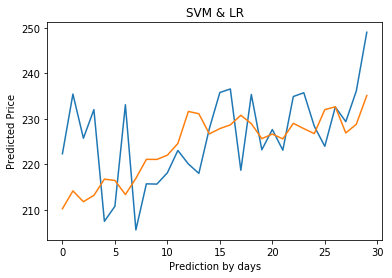

In [261]:
plt.plot(svm_prediction)  
plt.plot(lr_prediction)
plt.title('SVM & LR')  
plt.xlabel('Prediction by days')  
plt.ylabel('Predicted Price')  
plt.show()

In [0]:
def fnPlotTitle(inModel, inActual, inTitle):
  plt.title('Regression Model Predictions - '+ inTitle)  
  plt.xlabel('Prediction by days')  
  plt.ylabel('Predicted Price') 
  plt.plot(inModel, label="Predicted Price")
  plt.plot(inActual, label="Actual Price")
  plt.legend()
  plt.show()

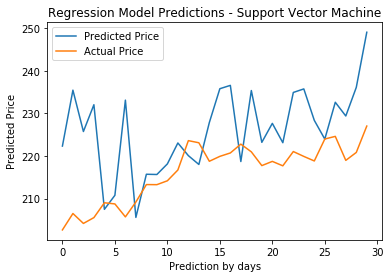

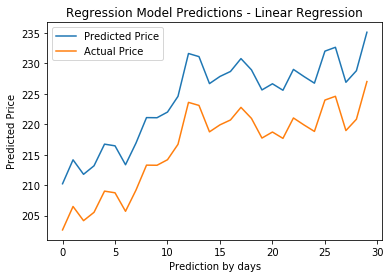

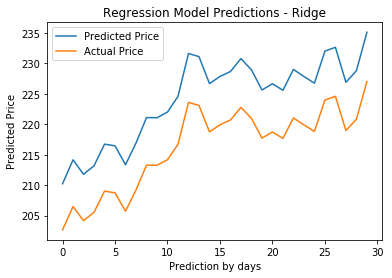

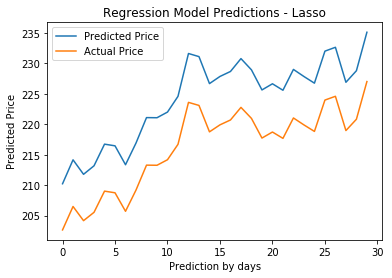

In [263]:
actual_close = np.array(df[['Adj Close']].tail(forecast_out))
#print(actual_close)
#len(actual_close)

fnPlotTitle(svm_prediction, actual_close,"Support Vector Machine")
fnPlotTitle(lr_prediction, actual_close, "Linear Regression")
fnPlotTitle(rr_prediction, actual_close,"Ridge")
fnPlotTitle(lso_prediction, actual_close,"Lasso")
 
#plt.show()